In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv(filepath_or_buffer='D:/Studies/Neuro/Lab 2/perceptron/cmake-build-debug/training_results.csv')
df

,Epoch,Predicted 0,Real 0,Predicted 1,Real 1
0,1,0.394724,1.000000,0.981970,0.601708
1,1,0.020664,0.000000,0.429670,0.711077
2,1,0.016318,0.689438,0.489154,0.587862
3,1,0.049166,0.293003,0.866436,0.594477
4,1,0.000710,0.361445,0.797113,0.490068
...,...,...,...,...,...
84995,5000,0.292576,0.298833,0.371014,0.363810
84996,5000,0.203813,0.177915,0.987945,1.000000
84997,5000,0.589738,0.551334,0.383269,0.346056
84998,5000,0.355640,0.365989,0.376494,0.362043


In [4]:
mse_data = pd.DataFrame({'Epoch': [], 'Value': []})
for group_name, group_data in df.groupby('Epoch'):
    general_pred_col = group_data.iloc[:, 1]
    general_real_col = group_data.iloc[:, 2]

    for i in range(3, len(group_data.columns), 2):
        pred_col = group_data.iloc[:, i]
        real_col = group_data.iloc[:, i+1]
        general_pred_col += pred_col
        general_real_col += real_col

    mse = np.mean((general_pred_col - general_real_col)**2)
    new_row = {'Epoch': group_name, 'Value': mse}
    mse_data = pd.concat([mse_data, pd.DataFrame([new_row])], ignore_index=True)
    # print(f"Epoch {group_name}: {mse:.5f}")
display(mse_data)

,Epoch,Value
0,1.0,0.172082
1,2.0,0.206268
2,3.0,0.249294
3,4.0,0.270313
4,5.0,0.300102
...,...,...
4995,4996.0,0.001885
4996,4997.0,0.001864
4997,4998.0,0.001888
4998,4999.0,0.001868


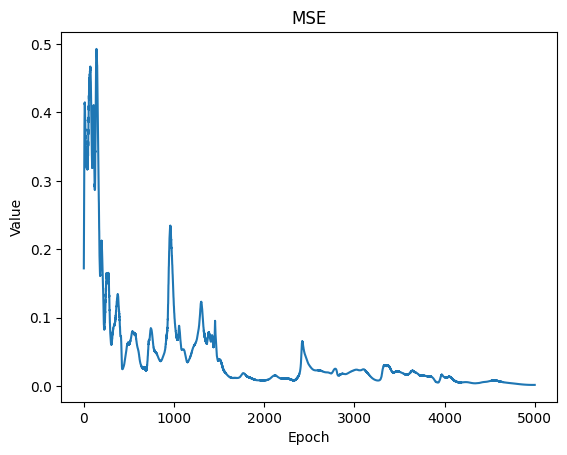

In [5]:
plt.plot(mse_data['Epoch'], mse_data['Value'])
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.title('MSE')
plt.show()

In [6]:
mae_data = pd.DataFrame({'Epoch': [], 'Value': []})
for group_name, group_data in df.groupby('Epoch'):
    general_pred_col = group_data.iloc[:, 1]
    general_real_col = group_data.iloc[:, 2]

    for i in range(3, len(group_data.columns), 2):
        pred_col = group_data.iloc[:, i]
        real_col = group_data.iloc[:, i+1]
        general_pred_col += pred_col
        general_real_col += real_col
    mae = np.mean(abs(general_pred_col - general_real_col))
    new_row = {'Epoch': group_name, 'Value': mae}
    mae_data = pd.concat([mae_data, pd.DataFrame([new_row])], ignore_index=True)
    # print(f"Epoch {group_name}: {mae:.5f}")
display(mae_data)

,Epoch,Value
0,1.0,0.335723
1,2.0,0.359978
2,3.0,0.399573
3,4.0,0.419754
4,5.0,0.447149
...,...,...
4995,4996.0,0.034084
4996,4997.0,0.033976
4997,4998.0,0.034161
4998,4999.0,0.034044


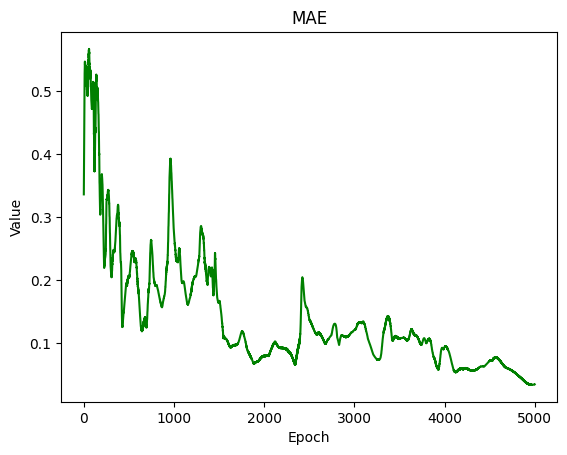

In [7]:
plt.plot(mae_data['Epoch'], mae_data['Value'], color='green')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.title('MAE')
plt.show()

In [10]:
def r_squared(y_true, y_pred):
    ssres = np.sum((y_true - y_pred)**2)
    sstot = np.sum((y_true - np.mean(y_true))**2)
    return 1 - (ssres / sstot)

r_squared_data = pd.DataFrame({'Epoch': [], 'Value': []})
for group_name, group_data in df.groupby('Epoch'):
    general_pred_col = group_data.iloc[:, 1]
    general_real_col = group_data.iloc[:, 2]
    for i in range(3, len(group_data.columns), 2):
        pred_col = group_data.iloc[:, i]
        real_col = group_data.iloc[:, i+1]
    r_squared_value = r_squared(general_real_col, general_pred_col)
    # print(f"Epoch {group_name}: {r_squared_value:.5f}")
    new_row = {'Epoch': group_name, 'Value': r_squared_value}
    r_squared_data = pd.concat([r_squared_data, pd.DataFrame([new_row])], ignore_index=True)
    # print(f"Epoch {group_name}: {mae:.5f}")
display(r_squared_data)

,Epoch,Value
0,1.0,-0.931957
1,2.0,-0.688598
2,3.0,-0.549387
3,4.0,-0.319579
4,5.0,-0.307495
...,...,...
4995,4996.0,0.972589
4996,4997.0,0.973173
4997,4998.0,0.972669
4998,4999.0,0.973239


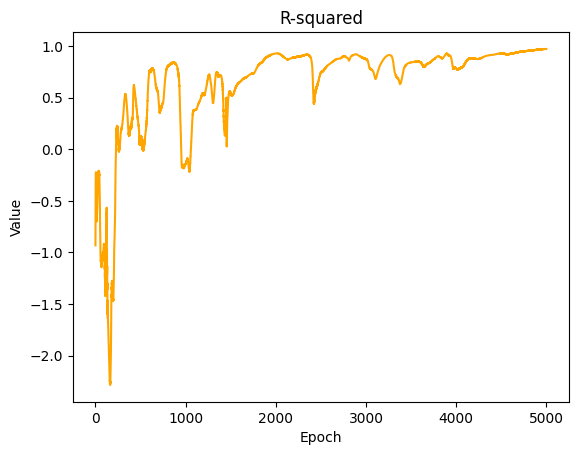

In [11]:
plt.plot(r_squared_data['Epoch'], r_squared_data['Value'], color='orange')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.title('R-squared')
plt.show()

In [14]:
df2 = pd.read_csv(filepath_or_buffer='D:/Studies/Neuro/Lab 2/perceptron/cmake-build-debug/testing_results.csv')
display(df2)

,Number,Predicted 0,Real 0,Predicted 1,Real 1
0,0,0.170989,0.212609,0.452906,0.462984
1,1,0.534558,0.366013,0.545119,0.330752
2,2,0.104684,0.036070,0.187750,0.432877
3,3,0.909530,0.803206,0.607500,0.621752
4,4,0.250403,0.221515,0.532010,0.486758
5,5,0.306701,0.302913,0.306009,0.269746


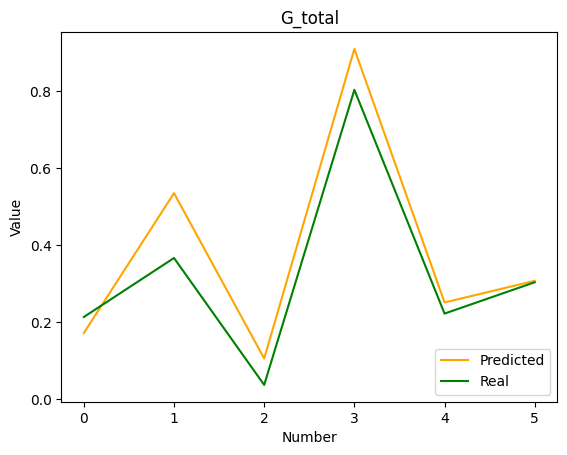

In [23]:
plt.plot(df2['Number'], df2['Predicted 0'], color='orange')
plt.plot(df2['Real 0'], color='green')
plt.xlabel('Number')
plt.ylabel('Value')
plt.title('G_total')
plt.legend(["Predicted", "Real"], loc ="lower right")
plt.show()

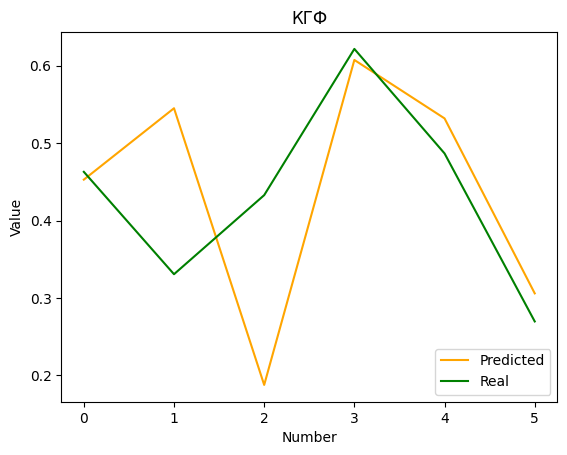

In [25]:
plt.plot(df2['Number'], df2['Predicted 1'], color='orange')
plt.plot(df2['Real 1'], color='green')
plt.xlabel('Number')
plt.ylabel('Value')
plt.title('КГФ')
plt.legend(["Predicted", "Real"], loc ="lower right")
plt.show()